In [89]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder


In [90]:
df_music=pd.read_csv('/Users/mateomp999/Library/CloudStorage/OneDrive-UniversidaddelosAndes/Work/BIP/BIP MUSIC CASO/DATA.csv', error_bad_lines=False, sep=';')
df_music
# se perdieron 197 filas danadas

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_32546/3967602383.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_music=pd.read_csv('/Users/mateomp999/Library/CloudStorage/OneDrive-UniversidaddelosAndes/Work/BIP/BIP MUSIC CASO/DATA.csv', error_bad_lines=False, sep=';')


,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,id,uri,track_href,analysis_url,duration_ms,time_signature,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Honest,Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.000,0.2120,...,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0,NaN,NaN,NaN,NaN
1,In The Hall Of The Mountain King from Peer Gyn...,Op. 46,London Symphony Orchestra,1806234,british orchestra,0.475,0.13,7.0,-17.719,1.0000,...,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0,NaN,NaN,NaN
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.000,0.1170,...,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0,NaN,NaN,NaN,NaN
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.000,0.0314,...,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0,NaN,NaN,NaN,NaN
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.000,0.0444,...,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,Younger with Time.,Ben Zaidi,668478,folk-pop,0.537,0.143,2.0,-16.992,1.000,0.0331,...,6o8pM5reLgjd5i8gDY3Irt,spotify:track:6o8pM5reLgjd5i8gDY3Irt,https://api.spotify.com/v1/tracks/6o8pM5reLgjd...,https://api.spotify.com/v1/audio-analysis/6o8p...,222827.0,3.0,NaN,NaN,NaN,NaN
10076,Your Latest Trick - Remastered 1996,Dire Straits,304382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,Your Love Is My Drug (8 Bit Slowed),just valery,97600,sad lo-fi,0.282,0.158,6.0,-7.783,1.000,0.0311,...,1EoThnDm6kQfB2idIfR30n,spotify:track:1EoThnDm6kQfB2idIfR30n,https://api.spotify.com/v1/tracks/1EoThnDm6kQf...,https://api.spotify.com/v1/audio-analysis/1EoT...,112582.0,4.0,NaN,NaN,NaN,NaN
10078,Your Power,Billie Eilish,988224,art pop,0.632,0.284,9.0,-14.025,0.000,0.0801,...,042Sl6Mn83JHyLEqdK7uI0,spotify:track:042Sl6Mn83JHyLEqdK7uI0,https://api.spotify.com/v1/tracks/042Sl6Mn83JH...,https://api.spotify.com/v1/audio-analysis/042S...,245897.0,4.0,NaN,NaN,NaN,NaN


In [91]:
df_music.columns

Index(['trackName', 'artistName', 'msPlayed', 'genre', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

# Clean Data


In [92]:
df_music=df_music[df_music["Unnamed: 22"].isnull()]
df_music

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,id,uri,track_href,analysis_url,duration_ms,time_signature,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Honest,Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0,NaN,NaN,NaN,NaN
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0,NaN,NaN,NaN,NaN
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0,NaN,NaN,NaN,NaN
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0,NaN,NaN,NaN,NaN
5,(L)only Child,salem ilese,2237969,alt z,0.645,0.611,8.0,-5.925,0.0,0.1370,...,22lJaG2yxlSjIwdUIddcFk,spotify:track:22lJaG2yxlSjIwdUIddcFk,https://api.spotify.com/v1/tracks/22lJaG2yxlSj...,https://api.spotify.com/v1/audio-analysis/22lJ...,144468.0,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10074,Younger,Ruel,5272303,alt z,0.745,0.477,11.0,-7.706,0.0,0.0880,...,2qXicQG06oT0ijKBznpgQv,spotify:track:2qXicQG06oT0ijKBznpgQv,https://api.spotify.com/v1/tracks/2qXicQG06oT0...,https://api.spotify.com/v1/audio-analysis/2qXi...,222320.0,4.0,NaN,NaN,NaN,NaN
10075,Younger with Time.,Ben Zaidi,668478,folk-pop,0.537,0.143,2.0,-16.992,1.0,0.0331,...,6o8pM5reLgjd5i8gDY3Irt,spotify:track:6o8pM5reLgjd5i8gDY3Irt,https://api.spotify.com/v1/tracks/6o8pM5reLgjd...,https://api.spotify.com/v1/audio-analysis/6o8p...,222827.0,3.0,NaN,NaN,NaN,NaN
10076,Your Latest Trick - Remastered 1996,Dire Straits,304382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,Your Love Is My Drug (8 Bit Slowed),just valery,97600,sad lo-fi,0.282,0.158,6.0,-7.783,1.0,0.0311,...,1EoThnDm6kQfB2idIfR30n,spotify:track:1EoThnDm6kQfB2idIfR30n,https://api.spotify.com/v1/tracks/1EoThnDm6kQf...,https://api.spotify.com/v1/audio-analysis/1EoT...,112582.0,4.0,NaN,NaN,NaN,NaN


In [93]:
df_music.drop(columns=['Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], inplace=True)
df_music

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_32546/3263338348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music.drop(columns=['Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], inplace=True)


,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Honest,Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0
5,(L)only Child,salem ilese,2237969,alt z,0.645,0.611,8.0,-5.925,0.0,0.1370,...,0.2370,0.645,157.475,audio_features,22lJaG2yxlSjIwdUIddcFk,spotify:track:22lJaG2yxlSjIwdUIddcFk,https://api.spotify.com/v1/tracks/22lJaG2yxlSj...,https://api.spotify.com/v1/audio-analysis/22lJ...,144468.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10074,Younger,Ruel,5272303,alt z,0.745,0.477,11.0,-7.706,0.0,0.0880,...,0.1200,0.454,136.055,audio_features,2qXicQG06oT0ijKBznpgQv,spotify:track:2qXicQG06oT0ijKBznpgQv,https://api.spotify.com/v1/tracks/2qXicQG06oT0...,https://api.spotify.com/v1/audio-analysis/2qXi...,222320.0,4.0
10075,Younger with Time.,Ben Zaidi,668478,folk-pop,0.537,0.143,2.0,-16.992,1.0,0.0331,...,0.1100,0.245,131.118,audio_features,6o8pM5reLgjd5i8gDY3Irt,spotify:track:6o8pM5reLgjd5i8gDY3Irt,https://api.spotify.com/v1/tracks/6o8pM5reLgjd...,https://api.spotify.com/v1/audio-analysis/6o8p...,222827.0,3.0
10076,Your Latest Trick - Remastered 1996,Dire Straits,304382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,Your Love Is My Drug (8 Bit Slowed),just valery,97600,sad lo-fi,0.282,0.158,6.0,-7.783,1.0,0.0311,...,0.4740,0.248,65.152,audio_features,1EoThnDm6kQfB2idIfR30n,spotify:track:1EoThnDm6kQfB2idIfR30n,https://api.spotify.com/v1/tracks/1EoThnDm6kQf...,https://api.spotify.com/v1/audio-analysis/1EoT...,112582.0,4.0


### Drop Null rows

In [94]:
print(df_music["trackName"].isnull().sum())

0


In [95]:
df_music[df_music["id"] == "22lJaG2yxlSjIwdUIddcFk"]


,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
5,(L)only Child,salem ilese,2237969,alt z,0.645,0.611,8.0,-5.925,0.0,0.137,...,0.237,0.645,157.475,audio_features,22lJaG2yxlSjIwdUIddcFk,spotify:track:22lJaG2yxlSjIwdUIddcFk,https://api.spotify.com/v1/tracks/22lJaG2yxlSj...,https://api.spotify.com/v1/audio-analysis/22lJ...,144468.0,3.0
5045,(L)only Child,salem ilese,2237969,alt z,0.645,0.611,8.0,-5.925,0.0,0.137,...,0.237,0.645,157.475,audio_features,22lJaG2yxlSjIwdUIddcFk,spotify:track:22lJaG2yxlSjIwdUIddcFk,https://api.spotify.com/v1/tracks/22lJaG2yxlSj...,https://api.spotify.com/v1/audio-analysis/22lJ...,144468.0,3.0


In [96]:
print(df_music["danceability"].isnull().sum())

540


### Set Index



In [97]:
# set id as index
df_music.set_index('id', inplace=True)

# Drop all rows with duplicate indices
df_music = df_music[~df_music.index.duplicated(keep='first')]

df_music

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
id,,,,,,,,,,,,,,,,,,,,,
7dTxqsaFGHOXwtzHINjfHv,Honest,Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.0,0.2570,0.577,162.139,audio_features,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
7K9Z3yFNNLv5kwTjQYGjnu,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.0,0.3660,0.509,132.012,audio_features,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3koAwrM1RO0TGMeQJ3qt9J,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.203,0.1190,0.896,120.969,audio_features,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4ByEFOBuLXpCqvO1kw8Wdm,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.000169,0.0625,0.507,124.945,audio_features,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0
22lJaG2yxlSjIwdUIddcFk,(L)only Child,salem ilese,2237969,alt z,0.645,0.611,8.0,-5.925,0.0,0.1370,...,2.05e-05,0.2370,0.645,157.475,audio_features,spotify:track:22lJaG2yxlSjIwdUIddcFk,https://api.spotify.com/v1/tracks/22lJaG2yxlSj...,https://api.spotify.com/v1/audio-analysis/22lJ...,144468.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4D7ERaKgv8NAeck8RzUtRz,Younger,Jonas Blue,2560215,pop,0.784,0.845,3.0,-2.793,1.0,0.0596,...,1.59e-05,0.0740,0.888,105.981,audio_features,spotify:track:4D7ERaKgv8NAeck8RzUtRz,https://api.spotify.com/v1/tracks/4D7ERaKgv8NA...,https://api.spotify.com/v1/audio-analysis/4D7E...,194721.0,4.0
2qXicQG06oT0ijKBznpgQv,Younger,Ruel,5272303,alt z,0.745,0.477,11.0,-7.706,0.0,0.0880,...,0.0,0.1200,0.454,136.055,audio_features,spotify:track:2qXicQG06oT0ijKBznpgQv,https://api.spotify.com/v1/tracks/2qXicQG06oT0...,https://api.spotify.com/v1/audio-analysis/2qXi...,222320.0,4.0
6o8pM5reLgjd5i8gDY3Irt,Younger with Time.,Ben Zaidi,668478,folk-pop,0.537,0.143,2.0,-16.992,1.0,0.0331,...,0.00572,0.1100,0.245,131.118,audio_features,spotify:track:6o8pM5reLgjd5i8gDY3Irt,https://api.spotify.com/v1/tracks/6o8pM5reLgjd...,https://api.spotify.com/v1/audio-analysis/6o8p...,222827.0,3.0


In [98]:
orginal_columns=df_music.columns


# Feature Creations 

### trackName

In [99]:
# Length of the track Name
df_music['trackName_length']=df_music["trackName"].str.len()


/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_32546/2921330234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['trackName_length']=df_music["trackName"].str.len()


In [100]:
# Number of words 
df_music['trackName_numberOfWords'] =df_music['trackName'].apply(lambda x: len(x.split()))


/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_32546/1800294371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['trackName_numberOfWords'] =df_music['trackName'].apply(lambda x: len(x.split()))


In [101]:
# Number of letters in the longest word 
#df_music['trackName_longestWord']=df_music['trackName'].apply(lambda x:len(max(x.split(), key=len)))

In [102]:
# Number of letters in the smallest word 
#df_music['trackName_smallestWord']=df_music['trackName'].apply(lambda x:len(min(x.split(), key=len)))

In [103]:
# Function to check for special characters in the artist name
def has_special_characters(name):
    pattern = r'[^\w\s]'
    return bool(re.search(pattern, name))

# Create a new column 'has_special_characters' with boolean values
df_music['trackName_has_special_characters'] = df_music['trackName'].apply(has_special_characters)

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_32546/3627258278.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['trackName_has_special_characters'] = df_music['trackName'].apply(has_special_characters)


In [104]:
# List of keywords, need to improve the list of words
english_keywords = [
    'dance', 'party', 'energy', 'vibe', 'upbeat', 'hit', 'groove', 'club', 
    'fun', 'beats', 'catchy', 'funky', 'rhythm', 'banger', 'hot', 'trendy', 
    'viral', 'hype', 'popular', 'chart', 'pump', 'jam', 'dancing', 'electro', 
    'fiesta', 'celebrate', 'cheer', 'happy', 'exciting', 'dynamic', 'bouncy', 
    'fresh', 'catchy', 'radio', 'addictive', 'anthem', 'catchiness', 'trend', 
    'euphoric', 'rave', 'rhythmic', 'rhythmical', 'melodic', 'contagious', 
    'chart-topping', 'top', 'mainstream', 'pop', 'festive', 'vibrant', 'dynamic', 
    'rhythmic', 'pumping', 'punchy', 'infectious', 'lively', 'uplifting', 'driving',
    'chartbuster', 'crowd-pleaser', 'groovy', 'feel-good', 'foot-tapping', 'hitmaker',
    'clubbing', 'energetic', 'sensational', 'hip', 'trending', 'smash', 'climbing', 
    'vogue', 'in-demand', 'stirring', 'inspiring', 'rave', 'soaring', 'stimulating', 
    'fire', 'boost', 'escalate', 'success', 'mainstream', 'upward', 'ascend', 'enthralling',
    'top-tier', 'unstoppable', 'playful', 'electrifying', 'pulsating', 'feel-good',
    'riveting', 'buzz', 'popularity', 'radiant', 'triumph', 'soar', 'rise', 'hit', 
    'captivating', 'soaring', 'uplifting', 'bubbling', 'upbeat', 'pumping', 'striking',
    'rhythmic', 'uplifting', 'exciting', 'memorable', 'catchy', 'groovy', 'fiery', 
    'driving', 'triumphant', 'thrilling', 'enthralling', 'amazing', 'stunning', 
    'electrifying', 'wonderful', 'uplifting', 'magnetic', 'appealing', 'superb',
    'vibrant', 'fascinating', 'addictive', 'exhilarating', 'unforgettable', 'energizing','died'
]

spanish_keywords = [
    'baile', 'fiesta', 'energía', 'vibrante', 'pegajoso', 'éxito', 'ritmo', 'club', 
    'diversión', 'latino', 'moderno', 'canción', 'popular', 'tendencia', 'viral', 
    'euforia', 'bailable', 'pegar', 'ritmo', 'caliente', 'movimiento', 'joven', 'alegre', 
    'emocionante', 'discoteca', 'celebrar', 'contento', 'dinámico', 'contagioso', 
    'bailar', 'estimulante', 'exaltante', 'enganchado', 'funky', 'rítmico', 'éxito', 
    'electrónico', 'pegajoso', 'vibrar', 'contagioso', 'rave', 'radio', 'atractivo', 
    'festivo', 'vibrante', 'contagiante', 'movido', 'bailongo', 'pop', 'latino', 
    'festividad', 'triunfo', 'eufórico', 'moderno', 'bailongo', 'sensacional', 
    'exitazo', 'adictivo', 'contagiar', 'festival', 'moda', 'trending', 'fuego', 
    'escalar', 'éxito', 'ascenso', 'arrojar', 'triunfante', 'emocionante', 'apasionante', 
    'magnífico', 'emocionante', 'vibrante', 'exitoso', 'fascinante', 'vibrante', 
    'entretenido', 'electrizante', 'irresistible', 'trascendente', 'unión', 'radiante', 
    'maravilloso', 'júbilo', 'mágico', 'triunfador', 'triunfar', 'éxito', 'captivante', 
    'exhilarante', 'inolvidable', 'euforizante', 'arrollador', 'maravilloso', 'jubiloso', 
    'magnético', 'atractivo', 'superior', 'emocionante', 'sorprendente', 'éxito', 'vibrante', 
    'electrizante', 'estimulante', 'magnífico', 'impresionante', 'apasionante', 'vibrante', 
    'exitoso', 'arrollador', 'exhilarante', 'inolvidable', 'fascinante', 'emocionante', 
    'envolvente', 'irresistible', 'trascendente', 'euforia', 'triunfo', 'éxito', 'emoción',
    'sorprendente', 'exquisito', 'impresionante', 'impresionante', 'espectacular', 'maravilla',
    'emocional', 'fascinante', 'éxito', 'vibrante', 'vital', 'exitoso', 'estelar', 'mágico',
    'entusiasta', 'inspirador', 'inspirar', 'triunfante', 'emocionante', 'sorprendente', 'asombroso'
]

# Function to check if any keyword is present in the trackName
def check_keywords(name):
    name = name.lower()
    return any(keyword in name.split() for keyword in english_keywords + spanish_keywords)

# Create a new column 'has_keyword' with boolean values
#df_music['trackName_has_keyword'] = df_music['trackName'].apply(check_keywords)

### artistName

In [105]:
# Length of the track Name
df_music['artistName_length']=df_music["artistName"].str.len()

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_32546/4264659160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['artistName_length']=df_music["artistName"].str.len()


In [106]:
# Number of words 
df_music['artistName_numberOfWords'] =df_music['artistName'].apply(lambda x: len(x.split()))

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_32546/1600723871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['artistName_numberOfWords'] =df_music['artistName'].apply(lambda x: len(x.split()))


In [107]:
# Number of letters in the longest word 
#df_music['artistName_longestWord']=df_music['artistName'].apply(lambda x:len(max(x.split(), key=len)))

In [108]:
# Number of letters in the smallest word 
#df_music['artistName_smallestWord']=df_music['artistName'].apply(lambda x:len(min(x.split(), key=len)))

In [109]:
# Function to check for special characters in the artist name
def has_special_characters(name):
    pattern = r'[^\w\s]'
    return bool(re.search(pattern, name))

# Create a new column 'has_special_characters' with boolean values
df_music['artistName_has_special_characters'] = df_music['artistName'].apply(has_special_characters)

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_32546/3070623252.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['artistName_has_special_characters'] = df_music['artistName'].apply(has_special_characters)


### msPlayed

In [110]:
df_music["msPlayed"].isnull().sum()

0

In [111]:
df_music['msPlayed_numeric'] = pd.to_numeric(df_music['msPlayed'], errors='coerce')

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_32546/2141704449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['msPlayed_numeric'] = pd.to_numeric(df_music['msPlayed'], errors='coerce')


In [112]:
df_music['msPlayed_numeric'].describe()

count    4.621000e+03
mean     1.526821e+06
std      5.437993e+06
min      0.000000e+00
25%      1.392240e+05
50%      2.697950e+05
75%      1.196295e+06
max      1.583671e+08
Name: msPlayed_numeric, dtype: float64

### genre

In [113]:
df_music["genre"].isnull().sum()

468

In [114]:
# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit and transform the feature
df_music['genre_encode'] = encoder.fit_transform(df_music["genre"])



/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_32546/2359003544.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['genre_encode'] = encoder.fit_transform(df_music["genre"])


In [115]:
df_music["genre"]

id
7dTxqsaFGHOXwtzHINjfHv                 NaN
7K9Z3yFNNLv5kwTjQYGjnu          glitchcore
3koAwrM1RO0TGMeQJ3qt9J    experimental pop
4ByEFOBuLXpCqvO1kw8Wdm          album rock
22lJaG2yxlSjIwdUIddcFk               alt z
                                ...       
4D7ERaKgv8NAeck8RzUtRz                 pop
2qXicQG06oT0ijKBznpgQv               alt z
6o8pM5reLgjd5i8gDY3Irt            folk-pop
1EoThnDm6kQfB2idIfR30n           sad lo-fi
042Sl6Mn83JHyLEqdK7uI0             art pop
Name: genre, Length: 4621, dtype: object

In [116]:
df_music['genre_encode']

id
7dTxqsaFGHOXwtzHINjfHv    513
7K9Z3yFNNLv5kwTjQYGjnu    261
3koAwrM1RO0TGMeQJ3qt9J    222
4ByEFOBuLXpCqvO1kw8Wdm     15
22lJaG2yxlSjIwdUIddcFk     16
                         ... 
4D7ERaKgv8NAeck8RzUtRz    434
2qXicQG06oT0ijKBznpgQv     16
6o8pM5reLgjd5i8gDY3Irt    229
1EoThnDm6kQfB2idIfR30n    456
042Sl6Mn83JHyLEqdK7uI0     44
Name: genre_encode, Length: 4621, dtype: int64

In [117]:
df_music["genre_encode"].isnull().sum()

0

### danceability

In [118]:
df_music["danceability"].isnull().sum()

1

In [119]:
df_music.dropna(subset=['danceability'], inplace=True)

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_32546/3746986709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music.dropna(subset=['danceability'], inplace=True)


In [120]:
df_music['danceability_numeric'] = pd.to_numeric(df_music['danceability'])

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_32546/2206494411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['danceability_numeric'] = pd.to_numeric(df_music['danceability'])


In [121]:
df_music["danceability_numeric"].describe()

count    4620.000000
mean        0.604560
std         0.155515
min         0.000000
25%         0.512000
50%         0.624000
75%         0.714250
max         0.976000
Name: danceability_numeric, dtype: float64

### energy

In [122]:
df_music["energy"].isnull().sum()

0

In [123]:
df_music['energy_numeric'] = pd.to_numeric(df_music['energy'])

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_32546/2968698918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['energy_numeric'] = pd.to_numeric(df_music['energy'])


In [124]:
df_music["energy_numeric"].describe()

count    4620.000000
mean        0.567645
std         0.241173
min         0.001080
25%         0.408750
50%         0.592000
75%         0.754000
max         0.999000
Name: energy_numeric, dtype: float64

### key

In [125]:
df_music["key"].isnull().sum()

0

In [126]:
df_music['key_numeric'] = pd.to_numeric(df_music['key'])

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_32546/1518090915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['key_numeric'] = pd.to_numeric(df_music['key'])


In [127]:
df_music['key_numeric'].describe()

count    4620.000000
mean        5.241126
std         3.576867
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        11.000000
Name: key_numeric, dtype: float64

### loudness

In [128]:
df_music["loudness"].isnull().sum()

0

In [129]:
df_music['loudness_numeric'] = pd.to_numeric(df_music['loudness'])

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_32546/776782948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['loudness_numeric'] = pd.to_numeric(df_music['loudness'])


In [130]:
df_music['loudness_numeric'].describe()

count    4620.000000
mean       -8.557138
std         5.236950
min       -42.044000
25%       -10.039750
50%        -7.166000
75%        -5.323500
max         3.010000
Name: loudness_numeric, dtype: float64

### mode

In [131]:
df_music["mode"].isnull().sum()

0

In [132]:
df_music['mode_numeric'] = pd.to_numeric(df_music['mode'])

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_32546/2084903110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['mode_numeric'] = pd.to_numeric(df_music['mode'])


In [133]:
df_music['mode_numeric'].describe()

count    4620.000000
mean        0.612987
std         0.487119
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: mode_numeric, dtype: float64

### speechiness

In [134]:
df_music["speechiness"].isnull().sum()

0

In [135]:
df_music['speechiness_numeric'] = pd.to_numeric(df_music['speechiness'])

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_32546/3932493218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['speechiness_numeric'] = pd.to_numeric(df_music['speechiness'])


In [136]:
df_music['speechiness_numeric'].describe()

count    4620.000000
mean        0.078607
std         0.080227
min         0.000000
25%         0.036100
50%         0.048200
75%         0.082225
max         0.966000
Name: speechiness_numeric, dtype: float64

### acousticness

In [137]:
df_music["acousticness"].isnull().sum()

0

In [138]:
df_music['acousticness_numeric'] = pd.to_numeric(df_music['acousticness'], errors='coerce')

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_32546/1422065840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['acousticness_numeric'] = pd.to_numeric(df_music['acousticness'], errors='coerce')


In [139]:
df_music['acousticness_numeric'].describe()

count    4619.000000
mean        0.357641
std         0.331797
min         0.000002
25%         0.052500
50%         0.240000
75%         0.653000
max         0.996000
Name: acousticness_numeric, dtype: float64

### instrumentalness

In [140]:
df_music["instrumentalness"].isnull().sum()

0

In [141]:
df_music['instrumentalness_numeric'] = pd.to_numeric(df_music['instrumentalness'], errors='coerce')

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_32546/1235522211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['instrumentalness_numeric'] = pd.to_numeric(df_music['instrumentalness'], errors='coerce')


In [142]:
df_music['instrumentalness_numeric'].describe()

count    4607.000000
mean        0.148555
std         0.308621
min         0.000000
25%         0.000000
50%         0.000024
75%         0.022550
max         0.989000
Name: instrumentalness_numeric, dtype: float64

### liveness


In [143]:
df_music["liveness"].isnull().sum()

0

In [144]:
df_music['liveness_numeric'] = pd.to_numeric(df_music['liveness'], errors='coerce')

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_32546/3650016859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['liveness_numeric'] = pd.to_numeric(df_music['liveness'], errors='coerce')


In [145]:
df_music['liveness_numeric'].describe()

count    4620.000000
mean        0.175133
std         0.130928
min         0.024900
25%         0.096375
50%         0.120000
75%         0.211000
max         0.964000
Name: liveness_numeric, dtype: float64

### valence

In [146]:
df_music["valence"].isnull().sum()

0

In [147]:
df_music['valence_numeric'] = pd.to_numeric(df_music['valence'], errors='coerce')

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_32546/62419954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['valence_numeric'] = pd.to_numeric(df_music['valence'], errors='coerce')


In [148]:
df_music['valence_numeric'].describe()

count    4620.000000
mean        0.435056
std         0.241862
min         0.000000
25%         0.239000
50%         0.409500
75%         0.614000
max         0.986000
Name: valence_numeric, dtype: float64

### tempo

In [149]:
df_music["tempo"].isnull().sum()

0

In [150]:
df_music['tempo_numeric'] = pd.to_numeric(df_music['tempo'], errors='coerce')

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_32546/830113223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['tempo_numeric'] = pd.to_numeric(df_music['tempo'], errors='coerce')


In [151]:
df_music['tempo_numeric'].describe()

count    4620.000000
mean      119.517144
std        29.018079
min         0.000000
25%        97.948250
50%       119.917000
75%       139.864250
max       236.196000
Name: tempo_numeric, dtype: float64

### type

In [152]:
df_music["type"].unique()

array(['audio_features'], dtype=object)

In [153]:
df_music["type"].isnull().sum()

0

### uri

In [154]:
df_music["uri"].str.split(":").str[0].unique()

array(['spotify'], dtype=object)

In [155]:
df_music["uri"].str.split(":").str[1].unique()

array(['track'], dtype=object)

### track_href


In [156]:

df_music["track_href"].str.split("/").str[3].unique()

array(['v1'], dtype=object)

### analysis_url

In [157]:
df_music["analysis_url"].str.split("/").str[4].unique()

array(['audio-analysis'], dtype=object)

### duration_ms

In [158]:
df_music["duration_ms"].isnull().sum()


0

In [159]:
df_music['duration_ms_numeric'] = pd.to_numeric(df_music['duration_ms'], errors='coerce')

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_32546/2280969919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['duration_ms_numeric'] = pd.to_numeric(df_music['duration_ms'], errors='coerce')


In [160]:
df_music['duration_ms_numeric'].describe()

count    4.620000e+03
mean     2.022118e+05
std      7.178076e+04
min      1.002700e+04
25%      1.619402e+05
50%      1.946095e+05
75%      2.295285e+05
max      1.847210e+06
Name: duration_ms_numeric, dtype: float64

### time_signature

In [161]:
df_music["time_signature"].isnull().sum()

0

In [162]:
df_music['time_signature_numeric'] = pd.to_numeric(df_music['time_signature'], errors='coerce')

/var/folders/8j/ym9nrjc575784gptt1wz_9w00000gn/T/ipykernel_32546/1228681303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['time_signature_numeric'] = pd.to_numeric(df_music['time_signature'], errors='coerce')


In [163]:
df_music['time_signature_numeric'].describe()

count    4620.000000
mean        3.919481
std         0.385392
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: time_signature_numeric, dtype: float64

# Model

### correlations

In [164]:
# drop the original columns
df_model=df_music.drop(columns=orginal_columns)


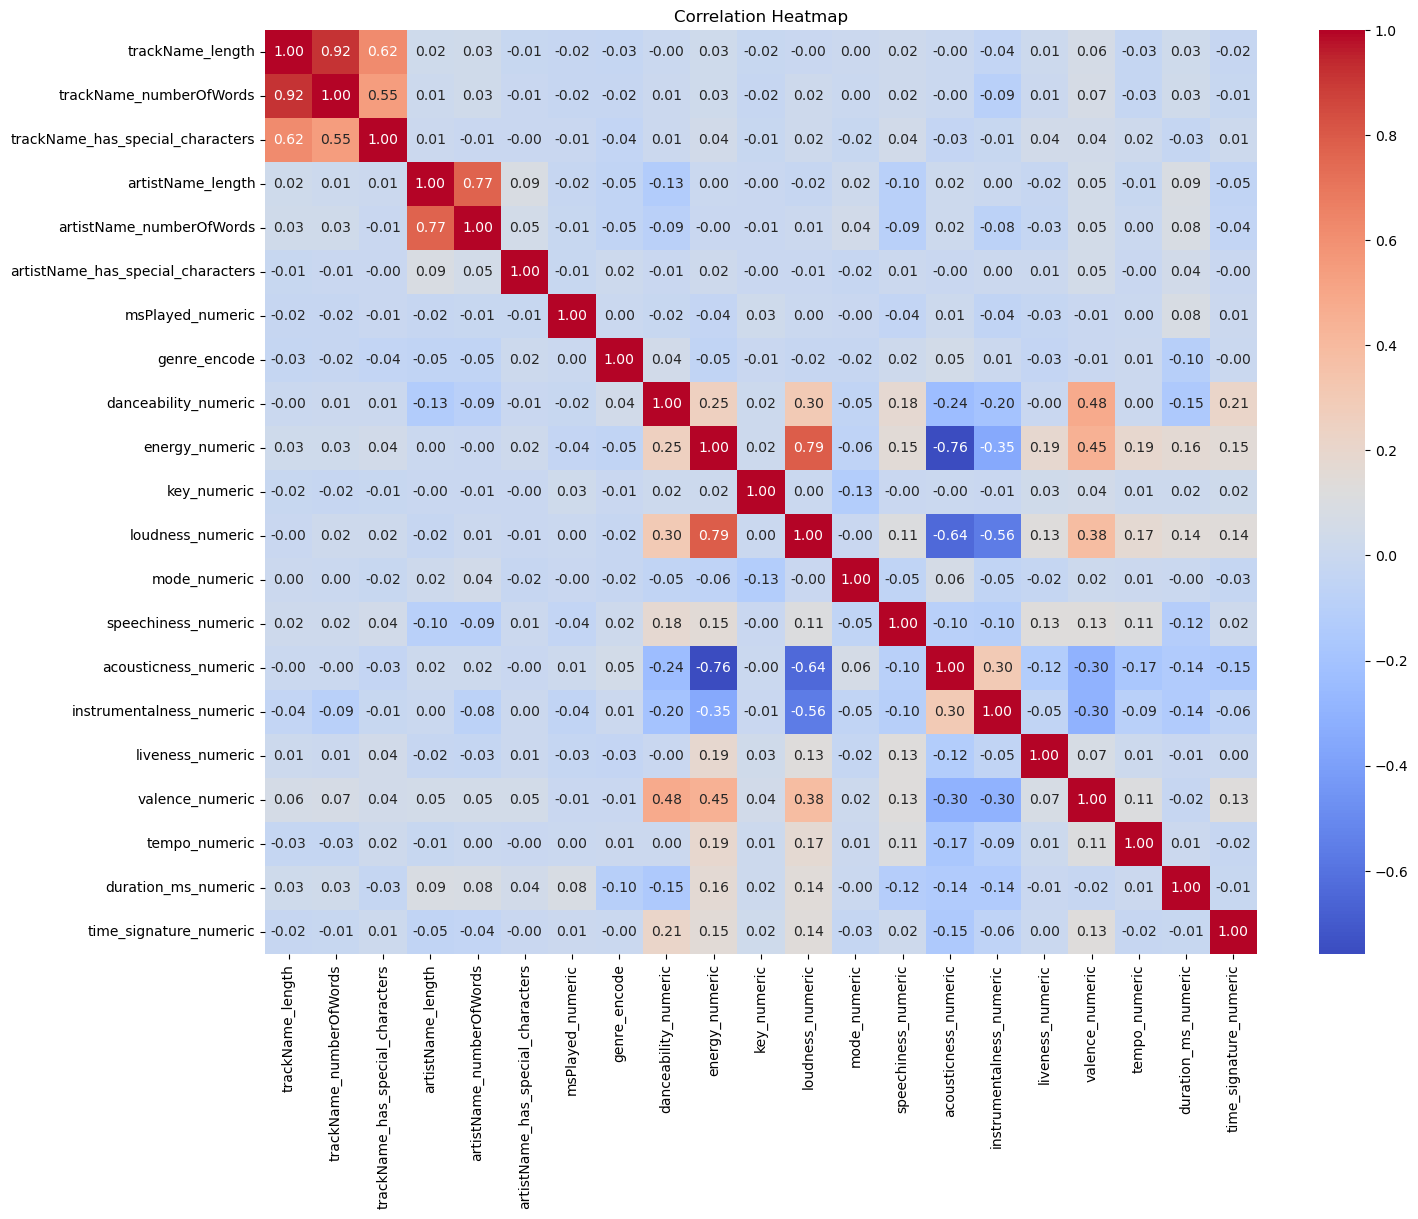

In [165]:
# correlation analisis
correlation_matrix=df_model.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [166]:

df_model.drop(columns=["trackName_length"], inplace=True)


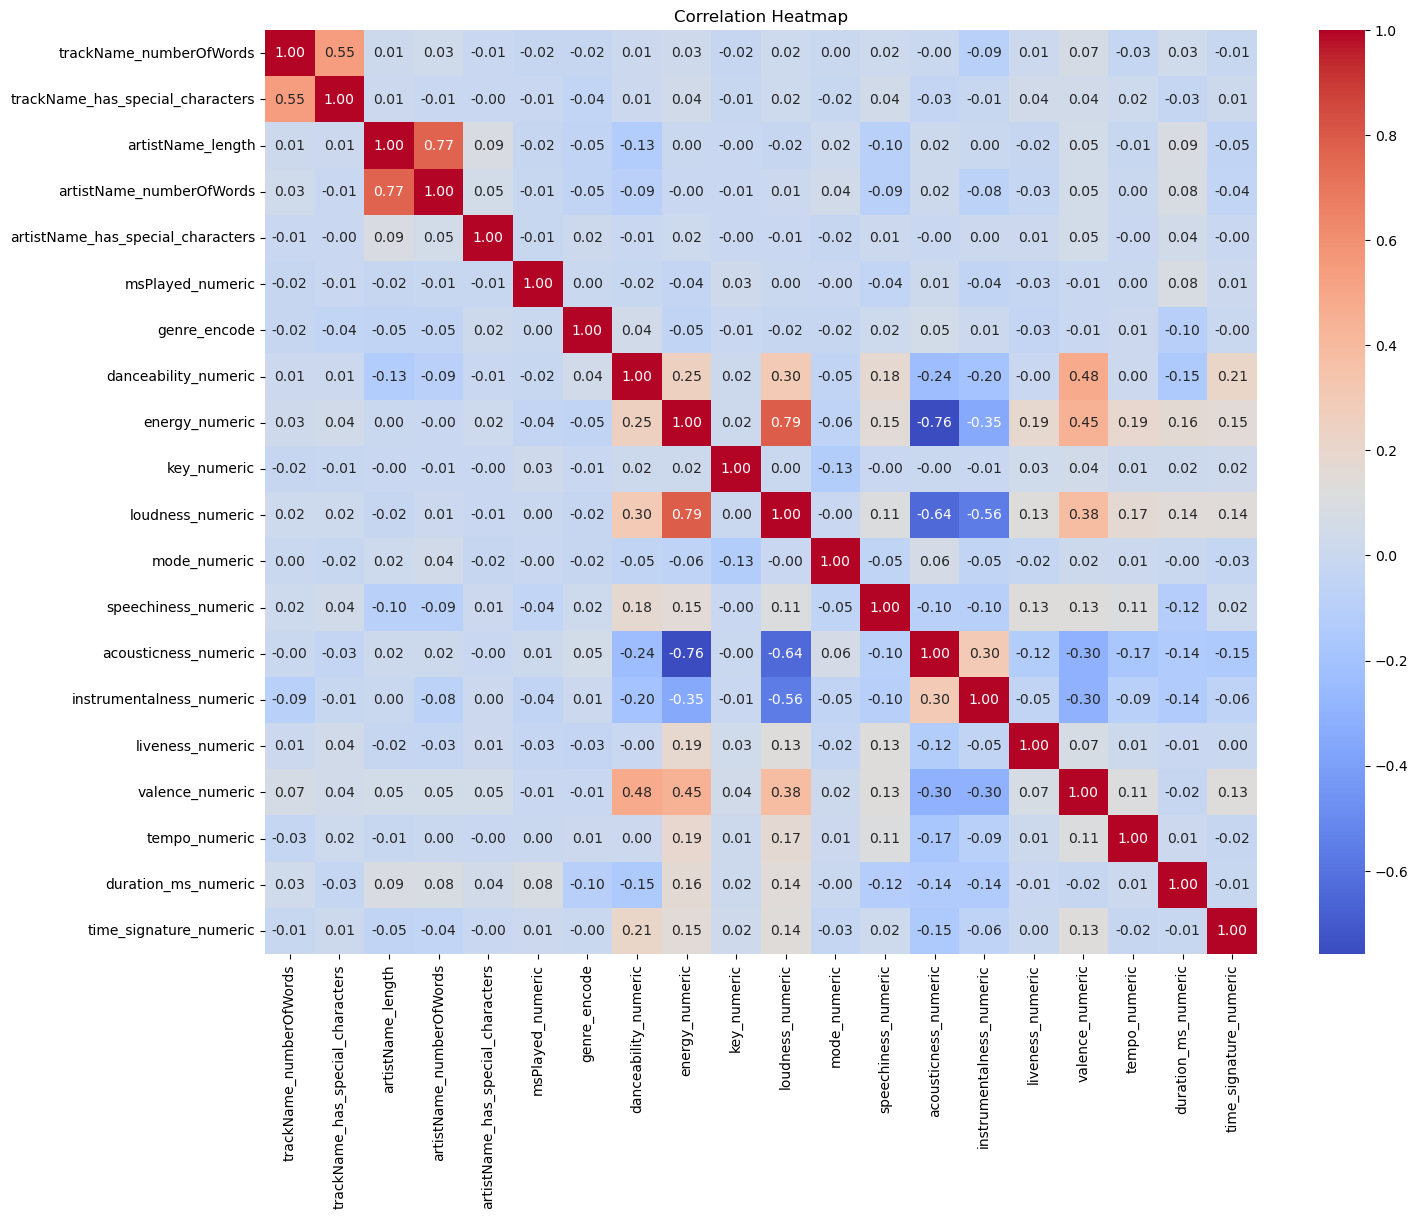

In [167]:
# correlation analisis
correlation_matrix=df_model.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### XGBOOST

In [168]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score




In [169]:
len(df_model.columns)


20

#### Danceability as output variable

In [170]:
# Split the data into features (X) and target (y)
X = df_model.drop('danceability_numeric', axis=1)  # Replace 'target_variable' with the name of your target column
y = df_model['danceability_numeric']>0.72


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create the XGBoost model
model = xgb.XGBClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [171]:
from sklearn.metrics import make_scorer, f1_score, roc_auc_score
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100,200, 300],
    'max_depth': [5,10, 15, 20]
    
    
}



# Define custom scorers for F1-score and ROC-AUC
f1_scorer = make_scorer(f1_score)
roc_auc_scorer = make_scorer(roc_auc_score)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring=f1_scorer, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and scores
best_params = grid_search.best_params_
#best_score_f1 = grid_search.best_score_
#best_score_roc_auc = grid_search.cv_results_['mean_test_ROC-AUC'][grid_search.best_index_]

print("Best Parameters:", best_params)
#print("Best F1-Score:", best_score_f1)
#print("Best ROC-AUC Score:", best_score_roc_auc)

#sociring F1 o AUC

Best Parameters: {'max_depth': 5, 'n_estimators': 100}


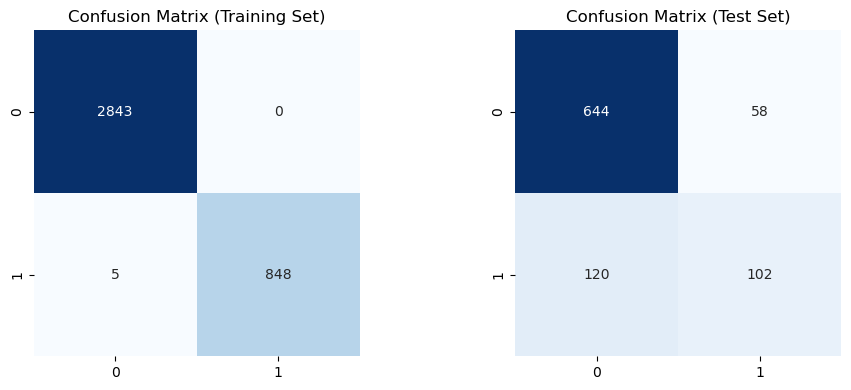

Training Set Metrics:
Accuracy: 0.9986
Precision: 1.0000
Recall: 0.9941
F1-Score: 0.9971
ROC-AUC: 1.0000

Test Set Metrics:
Accuracy: 0.8074
Precision: 0.6375
Recall: 0.4595
F1-Score: 0.5340
ROC-AUC: 0.8516


In [325]:
# Split the data into features (X) and target (y)
X = df_model.drop('danceability_numeric', axis=1)  # Replace 'target_variable' with the name of your target column
y = df_model['danceability_numeric']>0.72


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create the XGBoost model
best_params = {'max_depth': 5, 'n_estimators':100}
model= xgb.XGBClassifier(**best_params, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)


#y_pred = (y_pred_prob > threshold).astype(int)

# Make predictions on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)




# Calculate metrics for training set
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
roc_auc_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

# Calculate metrics for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Create confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrices
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.title("Confusion Matrix (Training Set)")

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.title("Confusion Matrix (Test Set)")

plt.tight_layout()
plt.show()

# Print evaluation metrics
print("Training Set Metrics:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1-Score: {f1_train:.4f}")
print(f"ROC-AUC: {roc_auc_train:.4f}")

print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-Score: {f1_test:.4f}")
print(f"ROC-AUC: {roc_auc_test:.4f}")

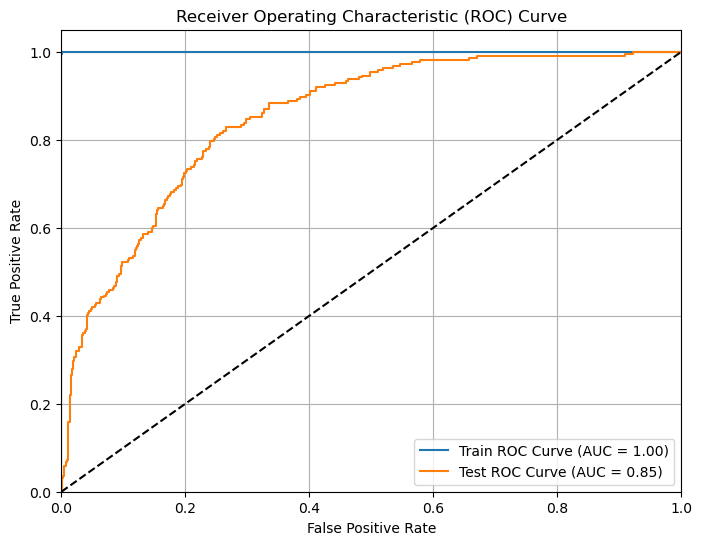

In [173]:
# Get predicted probabilities for positive class
y_train_proba = model.predict_proba(X_train)[:, 1]
y_test_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and ROC-AUC score
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba)

roc_auc_train = roc_auc_score(y_train, y_train_proba)
roc_auc_test = roc_auc_score(y_test, y_test_proba)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
## calculaar tanto en train como en test, para ver over/under fitting, mas de 5% de diferencia 

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


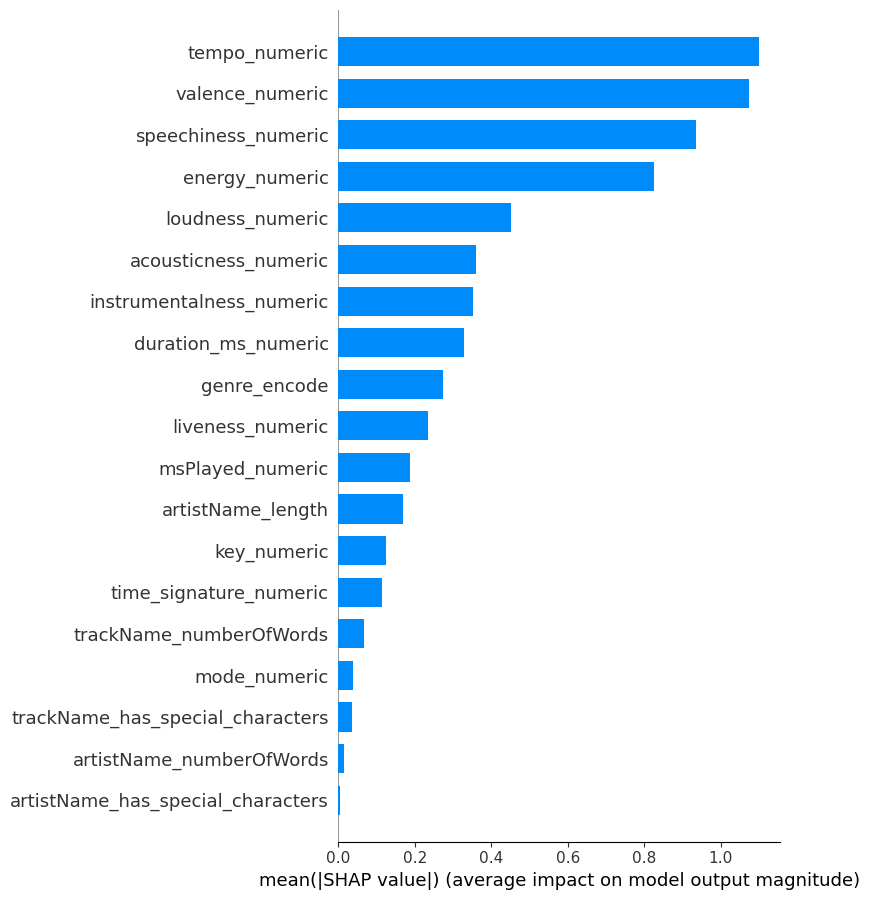

In [326]:
# Create an explainer object for the model
explainer = shap.Explainer(model)

# Calculate SHAP values
shap_values = explainer(X_test)

# Create a SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type='bar', max_display=30) 

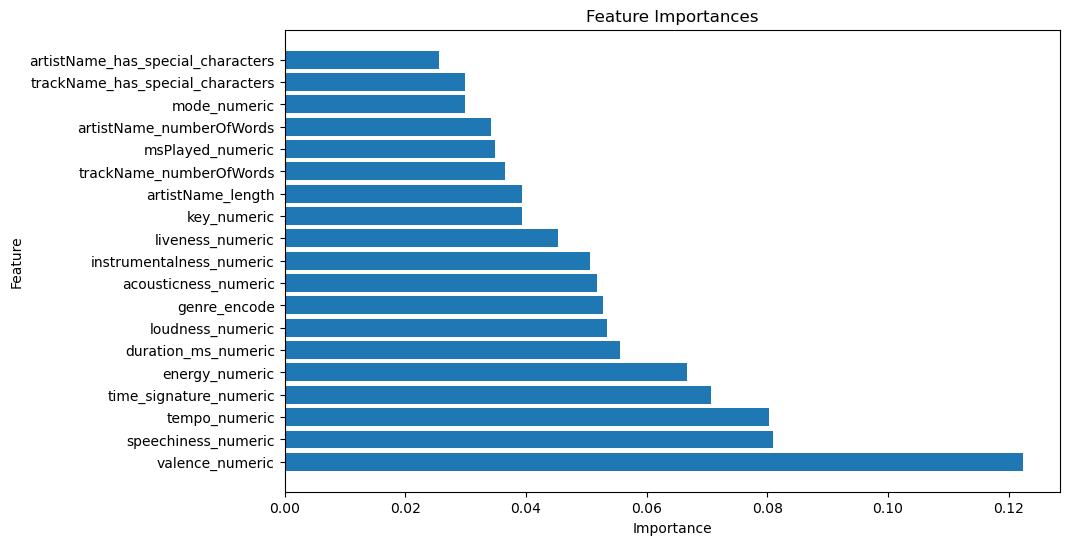

In [174]:
# Assuming you have already trained the XGBoost model and obtained the feature importances
feature_importances = model.feature_importances_

# Get the names of the features (assuming you have them in a list called 'feature_names')
feature_names = X_train.columns.tolist()

# Create a DataFrame to store the feature importances with their corresponding names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [175]:
feature_importance_df

,Feature,Importance
15,valence_numeric,0.122327
11,speechiness_numeric,0.080926
16,tempo_numeric,0.080293
18,time_signature_numeric,0.070616
7,energy_numeric,0.066705
17,duration_ms_numeric,0.055522
9,loudness_numeric,0.053380
6,genre_encode,0.052701
12,acousticness_numeric,0.051791
13,instrumentalness_numeric,0.050660


##### Model Statistics

In [176]:
# Filter the input variables for the data points where danceability is predicted to be true
#X_true_danceability = X_test[y_pred_prob > threshold]

# Calculate the mean of the filtered input variables
#[["valence_numeric", "time_signature_numeric", "tempo_numeric", "speechiness_numeric", "energy_numeric", "acousticness_numeric"]]

#mean_of_input_variables = X_true_danceability[["valence_numeric", "time_signature_numeric", "tempo_numeric", "speechiness_numeric", "energy_numeric", "acousticness_numeric"]].describe()


#mean_of_input_variables

In [177]:
# Filter the input variables for the data points where danceability is predicted to be true
#X_true_danceability = X_test[y_pred_prob > threshold]

# Calculate the mean of the filtered input variables
#[["valence_numeric", "time_signature_numeric", "tempo_numeric", "speechiness_numeric", "energy_numeric", "acousticness_numeric"]]

#mean_of_input_variables = X_true_danceability.mean()


#mean_of_input_variables

NameError: name 'X_true_danceability' is not defined

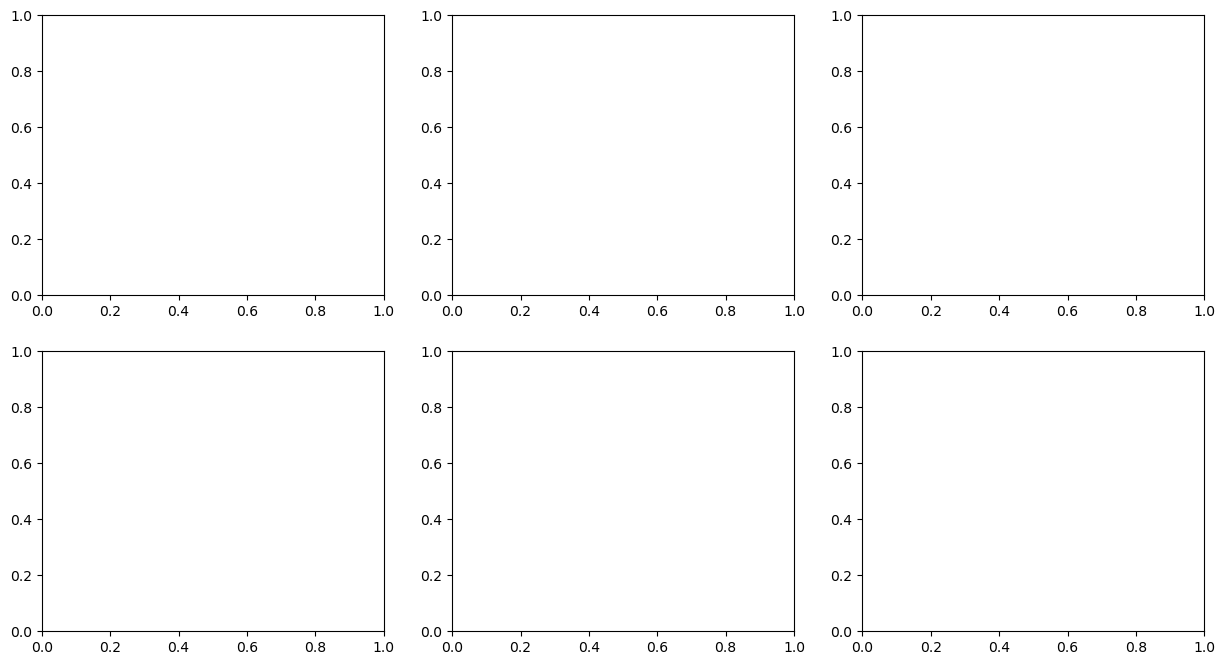

In [178]:
columns_to_plot = ["valence_numeric", "time_signature_numeric", "tempo_numeric", "speechiness_numeric", "energy_numeric", "acousticness_numeric"]

# Calculate the number of rows and columns for the grid
num_rows = 2
num_cols = len(columns_to_plot) // num_rows

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create an individual box and whiskers plot in the grid
for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=X_true_danceability[column], ax=axes[i])
    axes[i].set_title(f'Box and Whiskers Plot for {column}')
    axes[i].set_ylabel('Values')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout spacing
plt.tight_layout()

# Show the plots
plt.show()

In [179]:
# Filter the input variables for the data points where danceability is predicted to be false
X_true_danceability = X_test[y_pred_prob < threshold]

# Calculate the mean of the filtered input variables
mean_of_input_variables = X_true_danceability.mean()

mean_of_input_variables

NameError: name 'y_pred_prob' is not defined

In [ ]:
# Create a new DataFrame with the original 'genre_encoded' and the predicted 'danceability'
predictions_df = pd.DataFrame({'genre_encoded': X_test['genre_encode'], 'predicted_danceability': y_pred})

# Filter the DataFrame to include only rows where danceability is predicted as True
predicted_danceable_songs_df = predictions_df[predictions_df['predicted_danceability'] == True]

# Find the genre that appears the most in the filtered DataFrame
most_common_genre_encoded = predicted_danceable_songs_df['genre_encoded'].mode().values[0]


#Decode the genre
original_genre = encoder.inverse_transform([most_common_genre_encoded])[0]

original_genre

'pop'

In [ ]:
predicted_danceable_songs_df.value_counts()


genre_encoded  predicted_danceability
513            1                         16
434            1                         16
223            1                         14
16             1                         13
171            1                          7
                                         ..
188            1                          1
7              1                          1
191            1                          1
195            1                          1
190            1                          1
Length: 75, dtype: int64

In [ ]:
encoder.inverse_transform([187])[0]

'desi pop'

##### Data Statistics

In [ ]:
df_model[df_model['danceability_numeric']>0.72].mean()

trackName_numberOfWords              2.915349e+00
trackName_longestWord                6.407442e+00
trackName_smallestWord               3.962791e+00
trackName_has_special_characters     2.688372e-01
trackName_has_keyword                3.069767e-02
artistName_length                    9.633488e+00
artistName_numberOfWords             1.660465e+00
artistName_longestWord               6.273488e+00
artistName_smallestWord              5.094884e+00
artistName_has_special_characters    6.790698e-02
msPlayed_numeric                     1.517190e+06
genre_encode                         2.667135e+02
danceability_numeric                 7.877953e-01
energy_numeric                       6.096773e-01
key_numeric                          5.266047e+00
loudness_numeric                    -7.339741e+00
mode_numeric                         5.758140e-01
speechiness_numeric                  1.023843e-01
acousticness_numeric                 2.822710e-01
instrumentalness_numeric             1.018524e-01


In [ ]:
df_genre=df_model[df_model['danceability_numeric']>0.72]

most_common_genre_encoded = df_genre['genre_encode'].mode().values[0]


#Decode the genre
original_genre = encoder.inverse_transform([most_common_genre_encoded])[0]

original_genre

nan

### Random Forest 

In [180]:
from sklearn.ensemble import RandomForestClassifier


In [204]:
df_model.columns

Index(['trackName_numberOfWords', 'trackName_has_special_characters',
       'artistName_length', 'artistName_numberOfWords',
       'artistName_has_special_characters', 'msPlayed_numeric', 'genre_encode',
       'danceability_numeric', 'energy_numeric', 'key_numeric',
       'loudness_numeric', 'mode_numeric', 'speechiness_numeric',
       'acousticness_numeric', 'instrumentalness_numeric', 'liveness_numeric',
       'valence_numeric', 'tempo_numeric', 'duration_ms_numeric',
       'time_signature_numeric'],
      dtype='object')

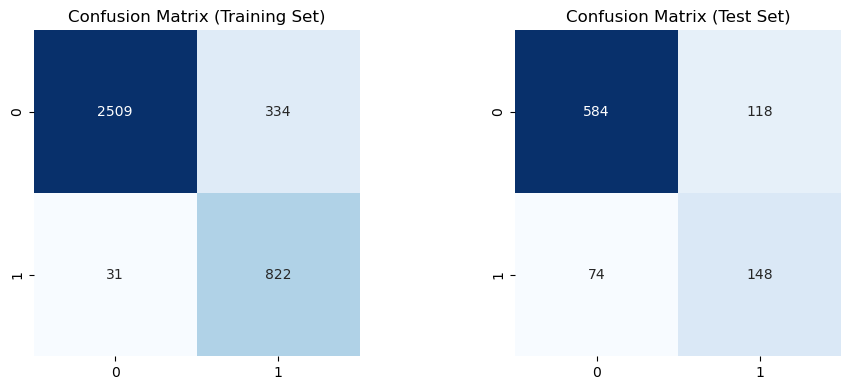

Training Set Metrics:
Accuracy: 0.9012
Precision: 0.7111
Recall: 0.9637
F1-Score: 0.8183
ROC-AUC: 0.9745

Test Set Metrics:
Accuracy: 0.7922
Precision: 0.5564
Recall: 0.6667
F1-Score: 0.6066
ROC-AUC: 0.8473


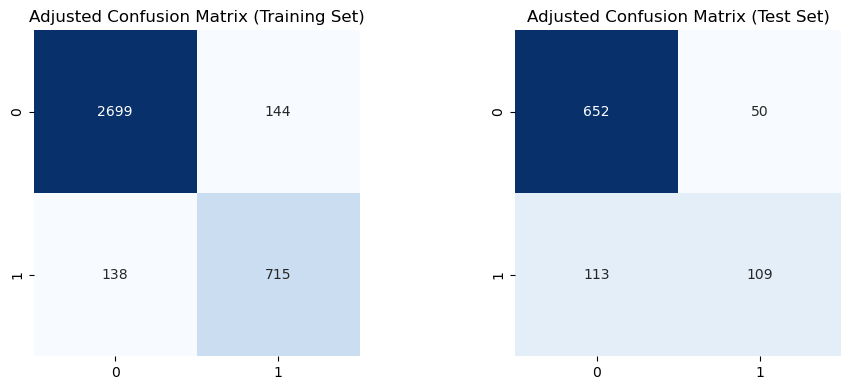


Adjusted Metrics:
Training Set Metrics (Adjusted):
Accuracy: 0.9237
Precision: 0.8324
Recall: 0.8382
F1-Score: 0.8353
ROC-AUC: 0.9745

Test Set Metrics (Adjusted):
Accuracy: 0.8236
Precision: 0.6855
Recall: 0.4910
F1-Score: 0.5722
ROC-AUC: 0.8473


In [337]:
# Split the data into features (X) and target (y)
X = df_model.drop(['danceability_numeric', "trackName_has_special_characters", "artistName_has_special_characters", "mode_numeric", "artistName_numberOfWords"], axis=1)  # Replace 'target_variable' with the name of your target column
y = df_model['danceability_numeric']>0.72


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.impute import SimpleImputer

# Initialize an imputer to fill missing values with mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your data and transform the features
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

from sklearn.preprocessing import StandardScaler

# Initialize a scaler and fit it on the training data, then transform both train and test data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_imputed)
X_test = scaler.transform(X_test_imputed)


# Create the XGBoost model
best_params = {'class_weight': {0: 1, 1: 4}, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
model = RandomForestClassifier(**best_params)
#class_weights = {0: 0.75, 1: 1.0}  # Adjust the values as needed
#model = RandomForestClassifier(n_estimators=100, class_weight=class_weights, random_state=42)


# Fit the model to the training data
model.fit(X_train, y_train)




# Make predictions on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)




# Calculate metrics for training set
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
roc_auc_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

# Calculate metrics for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Create confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrices
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.title("Confusion Matrix (Training Set)")

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.title("Confusion Matrix (Test Set)")

plt.tight_layout()
plt.show()

# Print evaluation metrics
print("Training Set Metrics:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1-Score: {f1_train:.4f}")
print(f"ROC-AUC: {roc_auc_train:.4f}")

print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-Score: {f1_test:.4f}")
print(f"ROC-AUC: {roc_auc_test:.4f}")


# New threshold
threshold = 0.607

# Adjust predictions based on the new threshold
y_train_pred_adjusted = (model.predict_proba(X_train)[:, 1] > threshold).astype(int)
y_test_pred_adjusted = (model.predict_proba(X_test)[:, 1] > threshold).astype(int)

# Calculate adjusted metrics
accuracy_train_adjusted = accuracy_score(y_train, y_train_pred_adjusted)
precision_train_adjusted = precision_score(y_train, y_train_pred_adjusted)
recall_train_adjusted = recall_score(y_train, y_train_pred_adjusted)
f1_train_adjusted = f1_score(y_train, y_train_pred_adjusted)
roc_auc_train_adjusted = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

accuracy_test_adjusted = accuracy_score(y_test, y_test_pred_adjusted)
precision_test_adjusted = precision_score(y_test, y_test_pred_adjusted)
recall_test_adjusted = recall_score(y_test, y_test_pred_adjusted)
f1_test_adjusted = f1_score(y_test, y_test_pred_adjusted)
roc_auc_test_adjusted = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Calculate adjusted confusion matrices
cm_train_adjusted = confusion_matrix(y_train, y_train_pred_adjusted)
cm_test_adjusted = confusion_matrix(y_test, y_test_pred_adjusted)

# Plot adjusted confusion matrices
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_train_adjusted, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.title("Adjusted Confusion Matrix (Training Set)")

plt.subplot(1, 2, 2)
sns.heatmap(cm_test_adjusted, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.title("Adjusted Confusion Matrix (Test Set)")

plt.tight_layout()
plt.show()

# Print adjusted metrics
print("\nAdjusted Metrics:")
print("Training Set Metrics (Adjusted):")
print(f"Accuracy: {accuracy_train_adjusted:.4f}")
print(f"Precision: {precision_train_adjusted:.4f}")
print(f"Recall: {recall_train_adjusted:.4f}")
print(f"F1-Score: {f1_train_adjusted:.4f}")
print(f"ROC-AUC: {roc_auc_train_adjusted:.4f}")

print("\nTest Set Metrics (Adjusted):")
print(f"Accuracy: {accuracy_test_adjusted:.4f}")
print(f"Precision: {precision_test_adjusted:.4f}")
print(f"Recall: {recall_test_adjusted:.4f}")
print(f"F1-Score: {f1_test_adjusted:.4f}")
print(f"ROC-AUC: {roc_auc_test_adjusted:.4f}")

In [191]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced', {0: 1, 1: 4}]  # Adjust class weights as needed
}



# Define F1-score as the scoring metric
f1_scorer = make_scorer(f1_score)
# Define ROC-AUC as the scoring metric
roc_auc_scorer = make_scorer(roc_auc_score)

# Perform grid search
grid_search = GridSearchCV(model, param_grid, scoring=roc_auc_scorer, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best F1-Score:", best_score)







KeyboardInterrupt: 

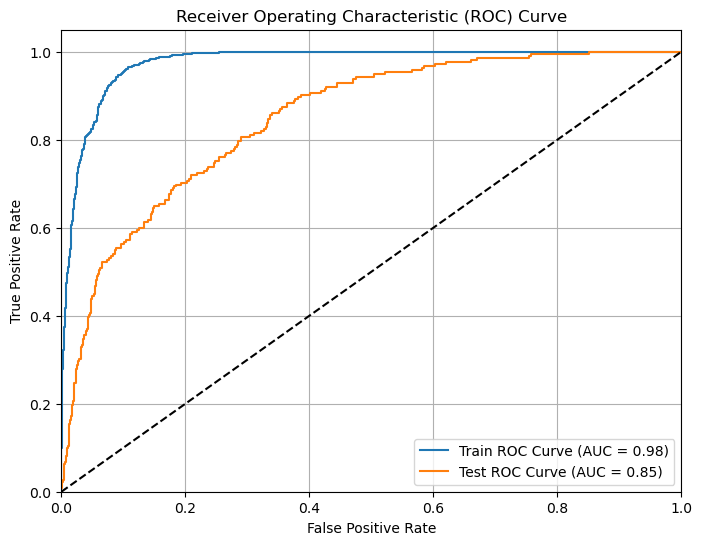

In [223]:
# Get predicted probabilities for positive class
y_train_proba = model.predict_proba(X_train)[:, 1]
y_test_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and ROC-AUC score
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba)

roc_auc_train = roc_auc_score(y_train, y_train_proba)
roc_auc_test = roc_auc_score(y_test, y_test_proba)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
## calculaar tanto en train como en test, para ver over/under fitting, mas de 5% de diferencia 

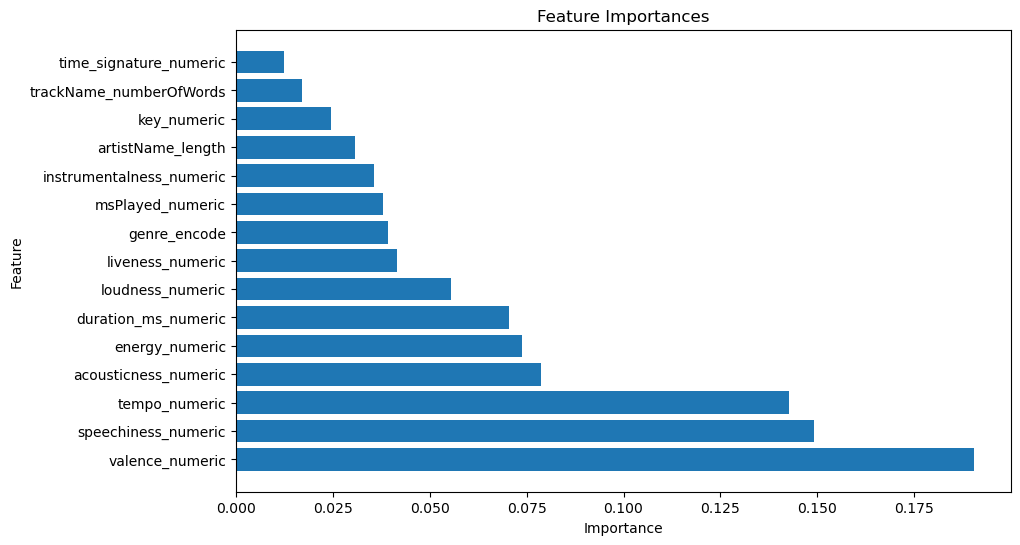

In [224]:
# Assuming you have already trained the XGBoost model and obtained the feature importances
feature_importances = model.feature_importances_

# Get the names of the features (assuming you have them in a list called 'feature_names')
feature_names = X.columns.tolist()

# Create a DataFrame to store the feature importances with their corresponding names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [289]:
feature_importance_df

,Feature,Importance
11,valence_numeric,0.190359
7,speechiness_numeric,0.149164
12,tempo_numeric,0.142763
8,acousticness_numeric,0.078693
4,energy_numeric,0.073836
13,duration_ms_numeric,0.070473
6,loudness_numeric,0.055444
10,liveness_numeric,0.041650
3,genre_encode,0.039148
2,msPlayed_numeric,0.037939


##### Model Statistics

In [290]:

# Filter the input data based on the condition of the target variable
filtered_X = X[y==1]

# Calculate the mean of each feature
mean_values = filtered_X.mean()
mean_values

trackName_numberOfWords     2.915349e+00
artistName_length           9.633488e+00
msPlayed_numeric            1.517190e+06
genre_encode                2.667135e+02
energy_numeric              6.096773e-01
key_numeric                 5.266047e+00
loudness_numeric           -7.339741e+00
speechiness_numeric         1.023843e-01
acousticness_numeric        2.822710e-01
instrumentalness_numeric    1.018524e-01
liveness_numeric            1.705283e-01
valence_numeric             5.820865e-01
tempo_numeric               1.181576e+02
duration_ms_numeric         1.903946e+05
time_signature_numeric      3.981395e+00
dtype: float64

In [291]:
# Filter the DataFrame where the output (danceability_numeric) is 1
filtered_df = df_model[df_model['danceability_numeric'] > 0.72]

# Count the occurrences of each genre in the filtered DataFrame
genre_counts = filtered_df['genre_encode'].value_counts()

# Get the most common genre
most_common_genre = genre_counts.idxmax()
most_common_genre

513

In [285]:
genre_counts.head()


513    109
434    100
16      60
223     51
171     35
Name: genre_encode, dtype: int64

In [288]:
encoder.inverse_transform([171])[0]

'dance pop'

In [316]:

import shap

df_prueba=pd.DataFrame(X_test)
df_prueba


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.579079,1.136450,-0.232765,-1.072777,-0.604344,-1.188984,0.040868,0.101806,0.990911,-0.489072,0.366274,0.191638,0.254443,0.402456,0.203051
1,0.074891,-1.851955,-0.266910,-0.183698,0.537125,0.492901,0.169093,-0.453879,-1.028325,-0.486804,-0.065845,0.439485,-0.675445,1.335598,0.203051
2,-0.933483,-0.932446,-0.255846,1.512572,0.954836,1.614158,0.843853,-0.527317,-0.580877,-0.489088,0.904528,-0.366018,0.875977,-0.338210,0.203051
3,-0.933483,-0.932446,-0.254969,0.038572,1.165760,-0.067727,1.174066,-0.333929,-0.288802,-0.489203,-0.551032,0.720379,-1.380076,-1.250491,0.203051
4,-0.933483,1.366327,0.098254,-0.990888,0.251758,1.614158,0.455546,-0.578724,-1.059580,-0.471131,-0.838354,-1.026944,-0.398744,0.148587,0.203051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,-0.933483,-1.622078,-0.178147,0.389525,1.087181,-0.348042,0.906150,-0.506510,-0.933175,-0.489203,1.404877,0.241207,0.701957,0.714213,0.203051
920,0.579079,-1.851955,0.342283,-0.183698,-0.277619,-1.469298,-0.102645,-0.661955,0.084574,-0.489080,-0.644279,-0.733658,-0.329543,1.511511,0.203051
921,0.074891,0.216940,0.037601,1.173318,0.797678,1.333843,0.677408,-0.389008,0.668725,-0.488756,-0.270534,0.038799,1.189434,0.034013,0.203051
922,-0.429296,-0.472691,-0.228875,-0.897301,1.269154,-1.469298,1.001698,0.014904,-1.065091,-0.481775,-0.575291,0.798864,0.255994,1.309581,0.203051


In [ ]:
shap.plots.bar(shap_values[0])

In [323]:
np.nan_to_num(X)

array([[1.00000e+00, 1.20000e+01, 1.91772e+05, ..., 1.62139e+02,
        1.91948e+05, 4.00000e+00],
       [1.00000e+00, 4.00000e+00, 1.45610e+05, ..., 1.32012e+02,
        1.45611e+05, 4.00000e+00],
       [1.00000e+00, 1.20000e+01, 2.50580e+04, ..., 1.20969e+02,
        8.95090e+04, 4.00000e+00],
       ...,
       [3.00000e+00, 9.00000e+00, 6.68478e+05, ..., 1.31118e+02,
        2.22827e+05, 3.00000e+00],
       [8.00000e+00, 1.10000e+01, 9.76000e+04, ..., 6.51520e+01,
        1.12582e+05, 4.00000e+00],
       [2.00000e+00, 1.30000e+01, 9.88224e+05, ..., 1.29642e+02,
        2.45897e+05, 4.00000e+00]])

In [340]:

X['acousticness_numeric'].fillna(-1, inplace=True)
X['instrumentalness_numeric'].fillna(-1, inplace=True)
X.isnull().sum()


trackName_numberOfWords     0
artistName_length           0
msPlayed_numeric            0
genre_encode                0
energy_numeric              0
key_numeric                 0
loudness_numeric            0
speechiness_numeric         0
acousticness_numeric        0
instrumentalness_numeric    0
liveness_numeric            0
valence_numeric             0
tempo_numeric               0
duration_ms_numeric         0
time_signature_numeric      0
dtype: int64

In [357]:
X.columns.tolist()


['trackName_numberOfWords',
 'artistName_length',
 'msPlayed_numeric',
 'genre_encode',
 'energy_numeric',
 'key_numeric',
 'loudness_numeric',
 'speechiness_numeric',
 'acousticness_numeric',
 'instrumentalness_numeric',
 'liveness_numeric',
 'valence_numeric',
 'tempo_numeric',
 'duration_ms_numeric',
 'time_signature_numeric']

In [360]:
nombresColumnas=['# Palabras nombre cancion',
 '# Letras nombre artista',
 'Duracion ms cancion',
 'Genero',
 'Nivel enrgia',
 'Llave cancion',
 'Sonoridad global (dB)',
 'Precencia palabras habladas',
 'Caracter acustico',
 'Probabilidad pista instrumental',
 'Precencia del publico en la pista',
 'Positivismo Musical',
 'Tempo',
 'Duracion ms pista',
 'Compas cancion']

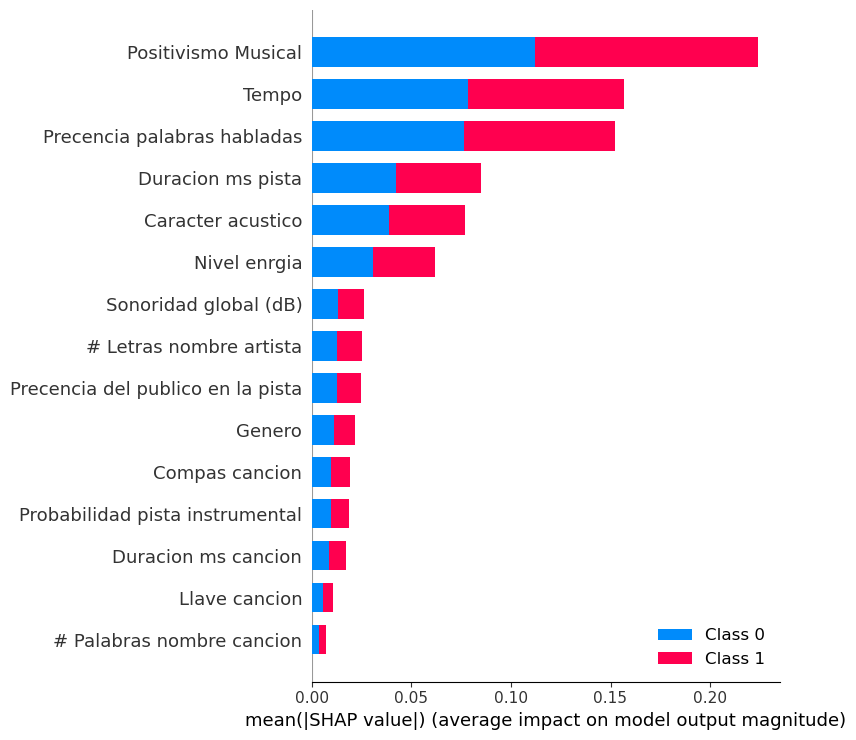

In [383]:
# Split the data into training and testing sets
X=X.astype('float32')
y=y.astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Create and fit the RandomForestClassifier model
best_params = {'class_weight': {0: 1, 1: 4}, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
model = RandomForestClassifier(**best_params)
model.fit(X_train, y_train)


# Create an explainer object for the model
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap.initjs()
shap_values = explainer.shap_values(X_test)
#shap_values = explainer(X, check_additivity=False)

#feature_names_list =X.columns.tolist()

# Create a SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type='bar', max_display=30,feature_names=nombresColumnas)  # Convert feature names to a list

plt.show()







In [390]:
# Calculate the absolute mean SHAP value for each feature
feature_importance_values = np.abs(shap_values[1]).mean(axis=0)

# Create a dictionary to map feature names to their importance values
feature_importance = dict(zip(feature_names, feature_importance_values))

# Sort the feature importance dictionary in descending order of importance values
sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))

# Print or visualize the sorted feature importance values
for feature, importance in sorted_feature_importance.items():
    print(f"{feature}: {importance}")

valence_numeric: 0.11197783041814517
tempo_numeric: 0.07840919237493926
speechiness_numeric: 0.07624235086006291
duration_ms_numeric: 0.04242728222745869
acousticness_numeric: 0.03846360301415828
energy_numeric: 0.03082426801759982
loudness_numeric: 0.01312615905578864
artistName_length: 0.012604974855985485
liveness_numeric: 0.01235800977645371
genre_encode: 0.010889582418813777
time_signature_numeric: 0.009463425698110775
instrumentalness_numeric: 0.009402338668544981
msPlayed_numeric: 0.008531437994248246
key_numeric: 0.005303367709050534
trackName_numberOfWords: 0.0034569439148513623


In [356]:
# Get class labels from the model
class_labels = model.classes_

# Print class labels and corresponding SHAP values for the sample
for class_idx, class_label in enumerate(class_labels):
    print(f"Class: {class_label}")
    print("SHAP Values:", shap_values[class_idx])
    print("-" * 20)

Class: 0.0
SHAP Values: [[ 4.75257488e-03  3.54382573e-02  8.33944288e-03 ... -5.02483281e-02
   6.49150101e-02 -5.38795264e-03]
 [ 2.84397043e-03 -7.77941551e-03 -2.05324619e-03 ... -3.39664805e-02
   1.06426675e-01 -4.17779443e-03]
 [ 1.71898939e-03 -1.39972421e-02  1.39781511e-03 ...  9.77992862e-02
  -2.43378390e-02 -2.01181240e-03]
 ...
 [ 4.42428552e-03  1.37520467e-02  1.30728560e-02 ...  1.67712064e-01
   3.93043607e-02 -2.99766741e-03]
 [ 9.33997618e-04  6.23614428e-05  2.02763715e-02 ... -4.68474175e-02
   1.09043856e-01 -4.03249557e-03]
 [ 1.17973863e-03  3.33113898e-02 -5.54980303e-04 ... -1.93805577e-02
   5.32320699e-02 -2.32894758e-03]]
--------------------
Class: 1.0
SHAP Values: [[-4.75257488e-03 -3.54382573e-02 -8.33944288e-03 ...  5.02483281e-02
  -6.49150101e-02  5.38795264e-03]
 [-2.84397043e-03  7.77941551e-03  2.05324619e-03 ...  3.39664805e-02
  -1.06426675e-01  4.17779443e-03]
 [-1.71898939e-03  1.39972421e-02 -1.39781511e-03 ... -9.77992862e-02
   2.43378390e-

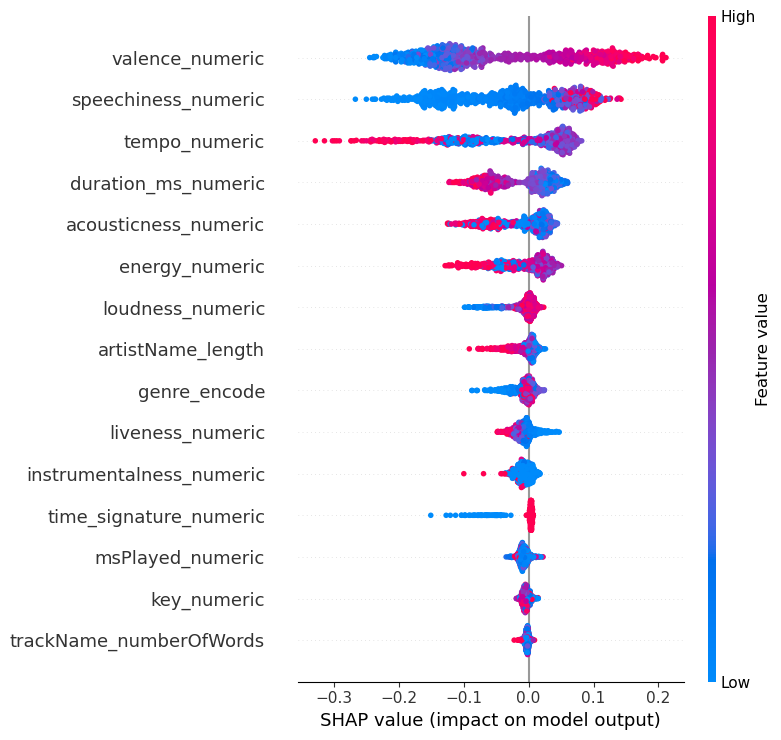

In [355]:
shap.summary_plot(shap_values[1], X_test, plot_type='dot')

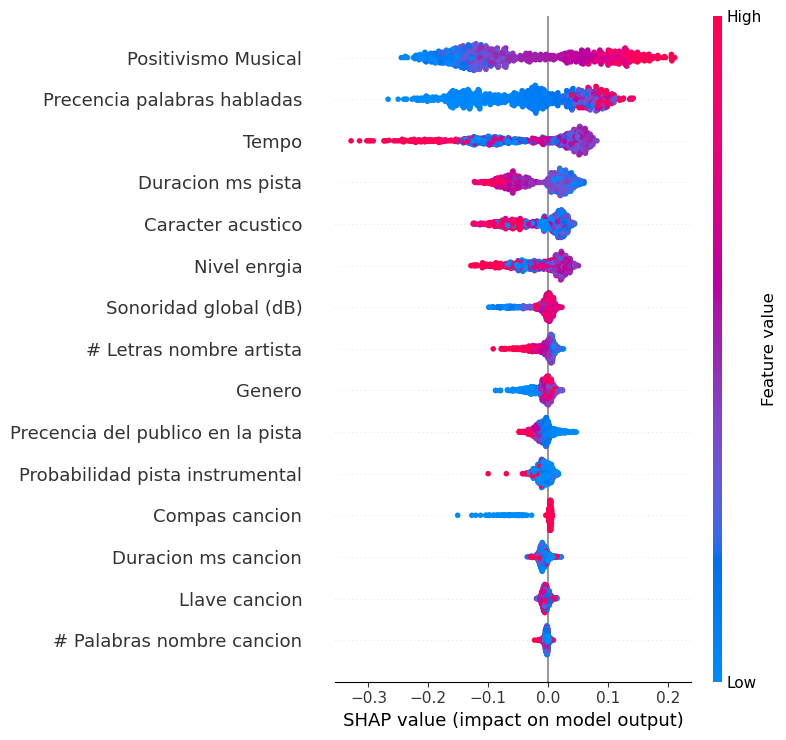

In [361]:
shap.summary_plot(shap_values[1], X_test, plot_type='dot', feature_names=nombresColumnas)

In [366]:
# Obtener índices de las características más importantes
top_features_idx = shap_values[1].mean(axis=0).argsort()[::-1][-5:]

# Obtener nombres de características
top_features = [feature_names[i] for i in top_features_idx]

# Filtrar el DataFrame de prueba por las características más importantes
X_test_top_features = X_test[top_features]

# Obtener los rangos de valores de las características más importantes
feature_ranges = X_test_top_features.describe().loc[['min', 'max']]

feature_ranges

,acousticness_numeric,duration_ms_numeric,speechiness_numeric,tempo_numeric,valence_numeric
min,0.000005,18333.0,0.0243,41.462002,0.000
max,0.996000,621659.0,0.5070,206.529007,0.971


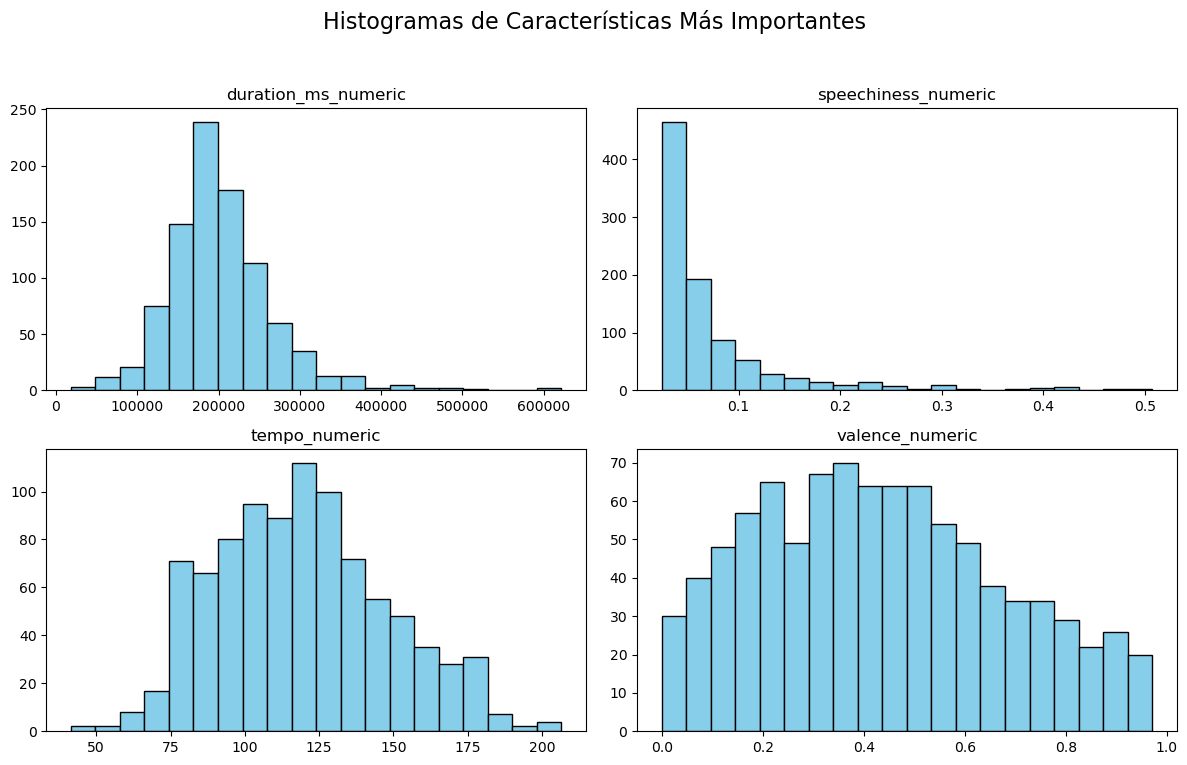

In [378]:
import math

# Obtener índices de las características más importantes
top_features_idx = shap_values[1].mean(axis=0).argsort()[::-1][-4:]

# Obtener nombres de características
top_features = [feature_names[i] for i in top_features_idx]

# Filtrar el DataFrame de prueba por las características más importantes
X_test_top_features = X_test[top_features]

# Calcular el número de filas y columnas para el grid de histogramas
num_rows = 2
num_cols = 2
num_histograms = num_rows * num_cols

# Crear el grid de subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.suptitle('Histogramas de Características Más Importantes', fontsize=16)

# Iterar a través de las características y crear los histogramas en el grid
for i, feature in enumerate(top_features):
    row = i // num_cols
    col = i % num_cols
    
    # Crear un histograma para la característica en el subplot correspondiente
    axes[row, col].hist(X_test_top_features[feature], bins=20, color='skyblue', edgecolor='black')
    axes[row, col].set_title(feature)
    
# Ajustar el espaciado entre los subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Mostrar la gráfica
plt.show()

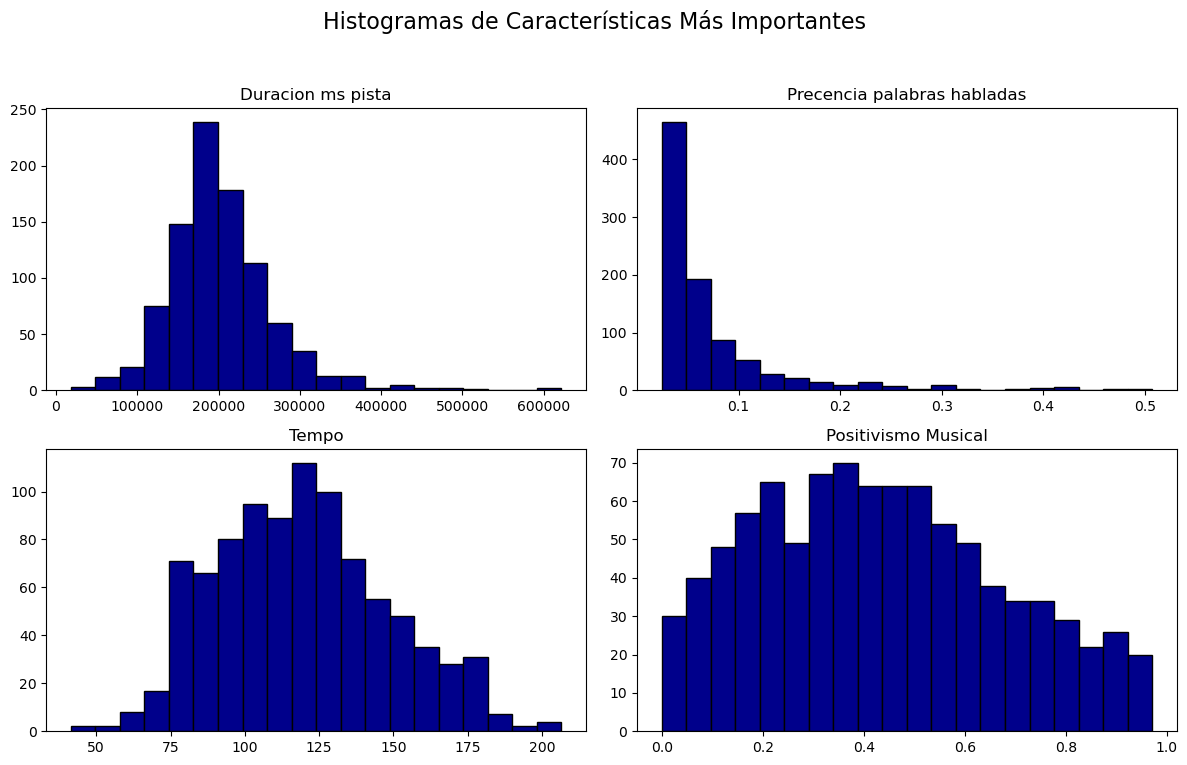

In [385]:
import math

# Obtener índices de las características más importantes
top_features_idx = shap_values[1].mean(axis=0).argsort()[::-1][-4:]

# Obtener nombres de características
top_features = [feature_names[i] for i in top_features_idx]

# Filtrar el DataFrame de prueba por las características más importantes
X_test_top_features = X_test[top_features]

# Títulos personalizados para cada gráfica
custom_titles = ['Duracion ms pista', 'Precencia palabras habladas', 'Tempo', 'Positivismo Musical']

# Calcular el número de filas y columnas para el grid de histogramas
num_rows = 2
num_cols = 2
num_histograms = num_rows * num_cols

# Crear el grid de subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.suptitle('Histogramas de Características Más Importantes', fontsize=16)

# Iterar a través de las características y crear los histogramas en el grid
for i, feature in enumerate(top_features):
    row = i // num_cols
    col = i % num_cols
    
    # Crear un histograma para la característica en el subplot correspondiente
    axes[row, col].hist(X_test_top_features[feature], bins=20, color='darkblue', edgecolor='black')
    axes[row, col].set_title(custom_titles[i])  # Asignar título personalizado
    
# Ajustar el espaciado entre los subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Mostrar la gráfica
plt.show()

In [380]:
nombresColumnas


['# Palabras nombre cancion',
 '# Letras nombre artista',
 'Duracion ms cancion',
 'Genero',
 'Nivel enrgia',
 'Llave cancion',
 'Sonoridad global (dB)',
 'Precencia palabras habladas',
 'Caracter acustico',
 'Probabilidad pista instrumental',
 'Precencia del publico en la pista',
 'Positivismo Musical',
 'Tempo',
 'Duracion ms pista',
 'Compas cancion']